<a href="https://colab.research.google.com/github/mamun2576/oop_For_python/blob/master/HeartDiseasePredictionfor(((Reserchpaper))).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline

<h2>Machine Learning Algorithms</h2>

1. Random Forest
2. K-Nearest Neighbors
3. Support Vector Classifier
4. Ada Boost Classifier
5. Multi-Layer Perceptron
6. Decision Tree

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
upload=files.upload()
df = pd.read_csv('Combination-of-5-heart-disease-datasets-_1_.csv')
df.head(10)

Saving Combination-of-5-heart-disease-datasets-_1_.csv to Combination-of-5-heart-disease-datasets-_1_.csv


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2,3,3
7,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1,7,2
9,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.00000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,125.492437,205.412605,0.226891,0.692437,134.02437,0.441176,0.976050,0.031933,-1.320168,1.278992,1.204202
std,9.358203,0.424884,0.935480,33.674110,106.711335,0.958666,0.914987,38.51423,0.642864,1.103511,3.975830,4.450363,5.820079,1.139319
min,28.000000,0.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.00000,-9.000000,-2.600000,-9.000000,-9.000000,-9.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,184.250000,0.000000,0.000000,120.00000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,228.000000,0.000000,0.000000,140.00000,0.000000,0.800000,2.000000,0.000000,3.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.000000,0.000000,2.000000,160.00000,1.000000,1.900000,2.000000,2.000000,6.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,2.000000,2.000000,202.00000,2.000000,6.200000,3.000000,9.000000,7.000000,4.000000


In [ ]:
df.shape

(1190, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1190 non-null   int64  
 1   sex       1190 non-null   int64  
 2   cp        1190 non-null   int64  
 3   trestbps  1190 non-null   int64  
 4   chol      1190 non-null   int64  
 5   fbs       1190 non-null   int64  
 6   restecg   1190 non-null   int64  
 7   thalach   1190 non-null   int64  
 8   exang     1190 non-null   int64  
 9   oldpeak   1190 non-null   float64
 10  slope     1190 non-null   int64  
 11  ca        1190 non-null   int64  
 12  thal      1190 non-null   int64  
 13  num       1190 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 130.3 KB


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [ ]:
df['num'].value_counts()

0    411
1    346
2    255
3    135
4     43
Name: num, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Actual numbers in the database')

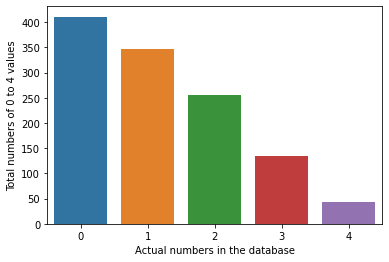

In [ ]:
sns.countplot(df['num'])
plt.ylabel('Total numbers of 0 to 4 values')
plt.xlabel('Actual numbers in the database')

In [ ]:
df.loc[df["num"]==2,"num"]=1
df.loc[df["num"]==3,"num"]=1
df.loc[df["num"]==4,"num"]=1
df['num'].value_counts()

1    779
0    411
Name: num, dtype: int64

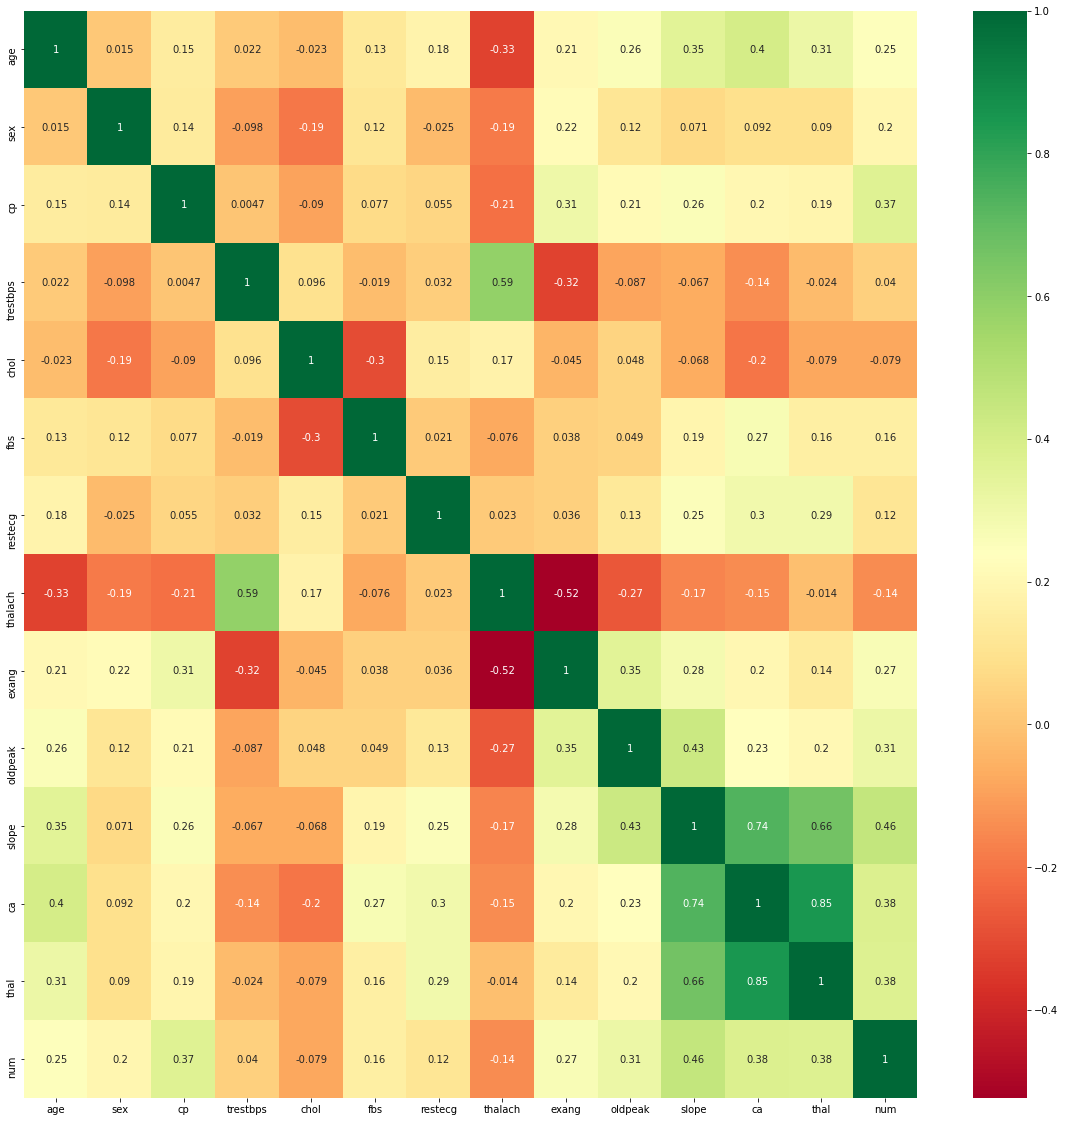

In [ ]:
import seaborn as sns
#obtain the correlation of each feature in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0daee61d0>,
      dtype=object)

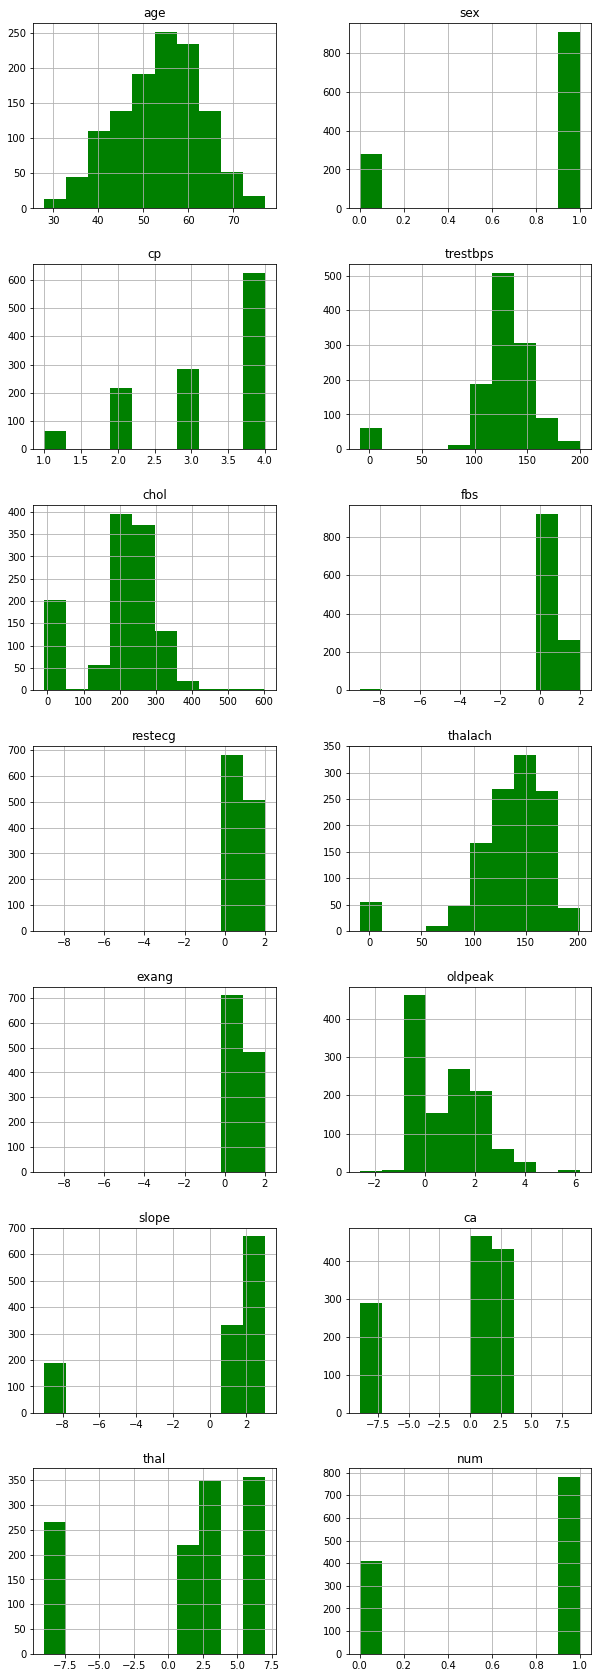

In [ ]:
df.hist(layout = (7, 2),
            figsize = (10, 30),
            color=['green'])

Text(0, 0.5, 'Samples')

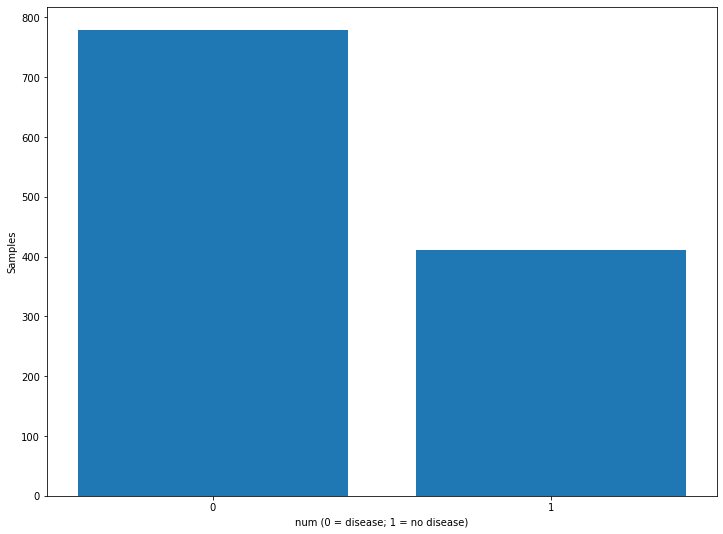

In [ ]:
rcParams['figure.figsize'] = 12, 9
plt.bar(df['num'].unique(), df['num'].value_counts())
plt.xticks([0, 1])
plt.xlabel('num (0 = disease; 1 = no disease)')
plt.ylabel('Samples')

Scale following columns:

1. age
2. chol
3. oldpeak
4. thalach
5. trestbps

Split into training and testing sets

In [ ]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 45)

<h2>Machine Learning Algorithms</h2>

<h3>Random Forest</h3>

In [ ]:
print("Training Random Forest")
rf = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 100)
    rf_classifier.fit(X_train, Y_train)
    rf.append(rf_classifier.score(X_test, Y_test))


Training Random Forest


Plotting Random Forest Results

Text(0.5, 1.0, 'Random Forest')

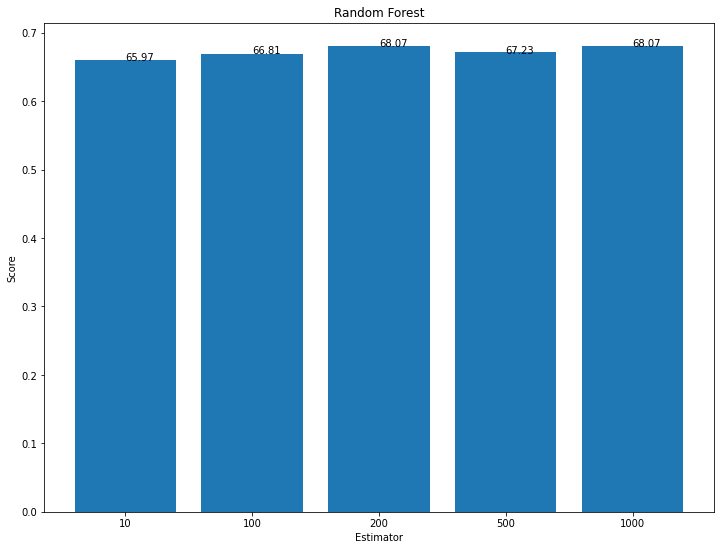

In [ ]:
plt.bar([i for i in range(len(estimators))], rf)
for i in range(len(estimators)):
    plt.text(i, round(rf[i],2), round(rf[i]*100,2))
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Estimator')
plt.ylabel('Score')
plt.title('Random Forest')

<h3>K-Nearest Neighbors</h3>

In [ ]:
print("Training K-Nearest Neighbors")
knn = []
for i in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors = i)
    knn_classifier.fit(X_train, Y_train)
    knn.append(knn_classifier.score(X_test, Y_test))

Training K-Nearest Neighbors


Text(0.5, 1.0, 'K-Nearest Neighbors')

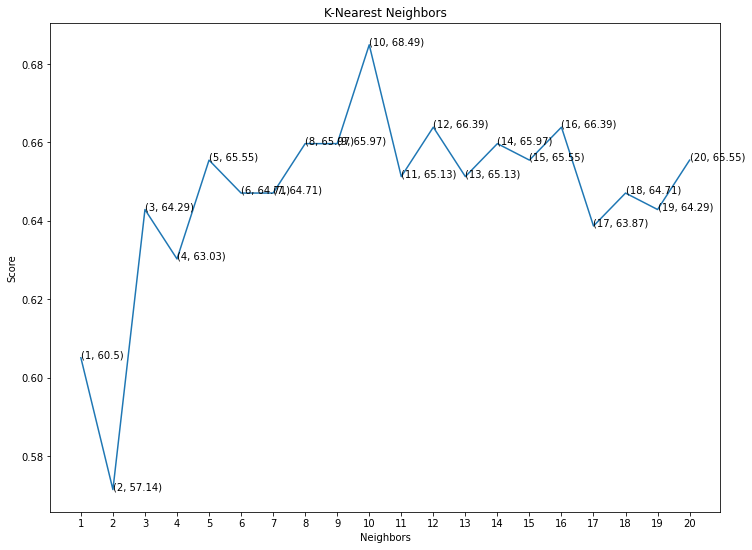

In [ ]:
plt.plot([i for i in range(1, 21)], knn)
for i in range(1, 21):
    plt.text(i, knn[i - 1], (i, round(knn[i - 1]*100, 2)))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Neighbors')
plt.ylabel('Score')
plt.title('K-Nearest Neighbors')

<h3>Support Vector Classifier</h3>

In [ ]:
svc = []
activators = ['poly', 'sigmoid', 'linear', 'rbf']
for i in range(len(activators)):
    SVclassifier = SVC(kernel = activators[i])
    SVclassifier.fit(X_train, Y_train)
    svc.append(SVclassifier.score(X_test, Y_test))

Text(0.5, 1.0, 'Support Vector Classifier')

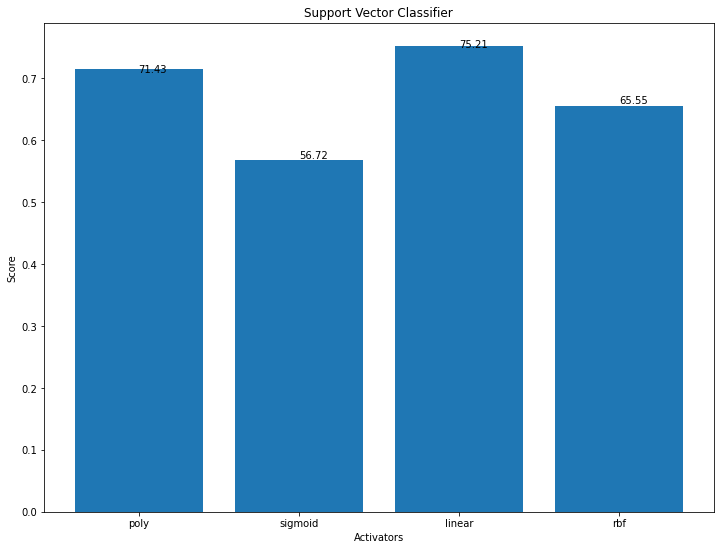

In [ ]:
plt.bar(activators, svc)
for i in range(len(activators)):
    plt.text(i, round(svc[i],2), round(svc[i]*100,2))
plt.xlabel('Activators')
plt.ylabel('Score')
plt.title('Support Vector Classifier')

<h3>Ada Boost Classifier</h3>

In [ ]:
abc = []
estimators = [5, 10, 50, 100, 200]
for i in range(len(estimators)):
    ABclassifier = AdaBoostClassifier(n_estimators = estimators[i],
                            learning_rate = 1)
    ABclassifier.fit(X_train, Y_train)
    abc.append(ABclassifier.score(X_test, Y_test))

Text(0.5, 1.0, 'Ada Boost Classifier')

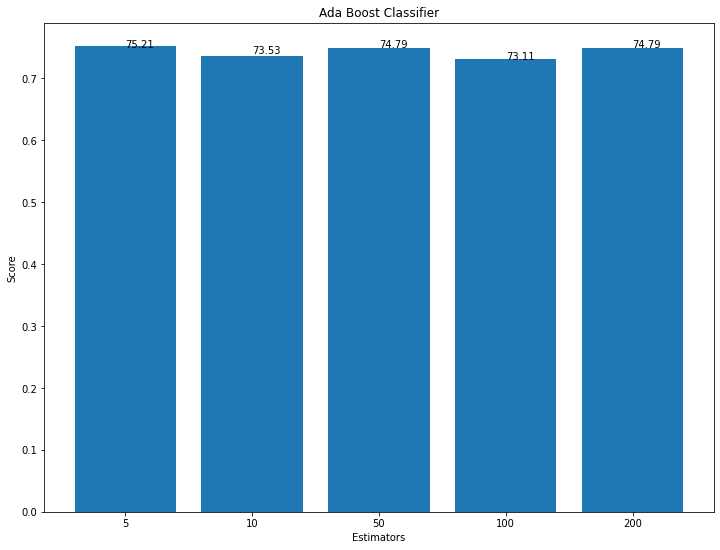

In [ ]:
plt.bar([i for i in range(len(estimators))], abc)
for i in range(len(estimators)):
    plt.text(i, round(abc[i],2), round(abc[i]*100,2))
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Ada Boost Classifier')

<h3>Multi-Layer Perceptron</h3>

In [ ]:
mlp = []
hidden_units = [5, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500]

for i in range(len(hidden_units)):
    MLPc = MLPClassifier(hidden_layer_sizes = (hidden_units[i],))
    MLPc.fit(X_train, Y_train)
    mlp.append(MLPc.score(X_test, Y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0.5, 1.0, 'Multi-Layer Perceptron')

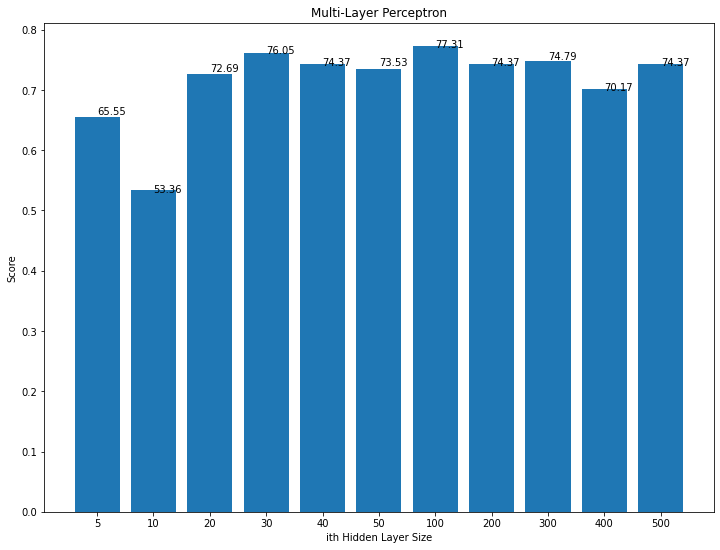

In [ ]:
plt.bar([i for i in range(len(hidden_units))], mlp)
for i in range(len(hidden_units)):
    plt.text(i, round(mlp[i],2), round(mlp[i]*100,2))
plt.xticks(ticks = [i for i in range(len(hidden_units))], labels = [str(hidden) for hidden in hidden_units])
plt.xlabel('ith Hidden Layer Size')
plt.ylabel('Score')
plt.title('Multi-Layer Perceptron')

<h3>Decision Tree Classifier</h3>

In [ ]:
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=1, random_state = 42)
tree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, log_loss
from sklearn import metrics
from sklearn import metrics

print('Confusion matrix of model',i , 'is :')
cm = confusion_matrix(Y_test, tree.predict(X_test))
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
print(cm)
print()
result1 = classification_report(Y_test, tree.predict(X_test))
print("Classification Report : ",)
print (result1)
print()
var = ((TP + TN)/(TP + TN + FP + FN)) *100
print('Testing accuracy : ',var)
print('Sensitivity : ', TP/(TP+FN))
print('Specificity : ', TN/(TN+FP))
print('false positive rate : ', FP/(FP+TN))
print('false negative rate : ', FN/(FN+TP))
print('Negative Predictive Value : ', TN/(TN+FN))
print('False Discovery rate : ', FP/(TP+FP))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, tree.predict(X_test)))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, tree.predict(X_test)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, tree.predict(X_test))))
print('Log_Loss:', metrics.log_loss(Y_test, tree.predict(X_test)))



Confusion matrix of model 10 is :
[[ 33  53]
 [  7 145]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.82      0.38      0.52        86
           1       0.73      0.95      0.83       152

    accuracy                           0.75       238
   macro avg       0.78      0.67      0.68       238
weighted avg       0.77      0.75      0.72       238


Testing accuracy :  74.78991596638656
Sensitivity :  0.825
Specificity :  0.7323232323232324
false positive rate :  0.2676767676767677
false negative rate :  0.175
Negative Predictive Value :  0.9539473684210527
False Discovery rate :  0.6162790697674418
Mean Absolute Error: 0.25210084033613445
Mean Squared Error: 0.25210084033613445
Root Mean Squared Error: 0.5020964452534338
Log_Loss: 8.707432614951435


<h3>Linear Classifiers with stochastic gradient descent training</h3>

In [ ]:
sgd = []
loss_func = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron',
       'squared_loss', 'epsilon_insensitive','squared_epsilon_insensitive']
for i in range(len(loss_func)):
    linearc = SGDClassifier(loss = loss_func[i])
    linearc.fit(X_train, Y_train)
    sgd.append(linearc.score(X_test, Y_test))

Text(0.5, 1.0, 'Linear Classifiers')

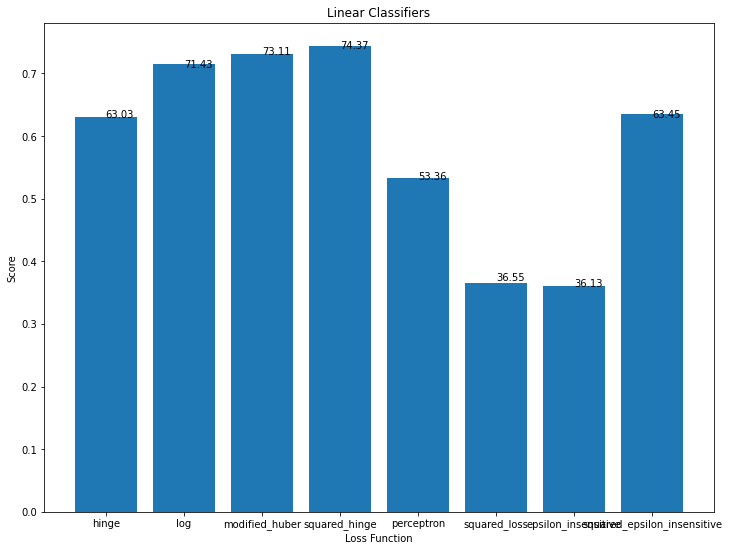

In [ ]:
plt.bar(loss_func, sgd)
for i in range(len(loss_func)):
    plt.text(i, round(sgd[i],2), round(sgd[i]*100,2))
plt.xlabel('Loss Function')
plt.ylabel('Score')
plt.title('Linear Classifiers')

In [ ]:
from sklearn.metrics import accuracy_score

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

Y_pred = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
print(round(acc_gaussian,2,), "%")

75.0 %


**Neural** **Network**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,epochs=1190)

Epoch 1/1190
30/30 [==============================] - 1s 1ms/step - loss: 19.8516 - accuracy: 0.3590
Epoch 2/1190
30/30 [==============================] - 0s 1ms/step - loss: 4.1430 - accuracy: 0.5035
Epoch 3/1190
30/30 [==============================] - 0s 1ms/step - loss: 2.2524 - accuracy: 0.5952
Epoch 4/1190
30/30 [==============================] - 0s 1ms/step - loss: 2.1316 - accuracy: 0.5901
Epoch 5/1190
30/30 [==============================] - 0s 1ms/step - loss: 1.7710 - accuracy: 0.5860
Epoch 6/1190
30/30 [==============================] - 0s 1ms/step - loss: 1.4808 - accuracy: 0.6097
Epoch 7/1190
30/30 [==============================] - 0s 1ms/step - loss: 1.1939 - accuracy: 0.6412
Epoch 8/1190
30/30 [==============================] - 0s 1ms/step - loss: 1.1145 - accuracy: 0.6168
Epoch 9/1190
30/30 [==============================] - 0s 2ms/step - loss: 0.8791 - accuracy: 0.6691
Epoch 10/1190
30/30 [==============================] - 0s 1ms/step - loss: 0.9074 - accuracy: 0.663

In [ ]:
Y_pred_nn = model.predict(X_test)

In [ ]:
Y_pred_nn.shape

(238, 1)

In [ ]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [ ]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

The accuracy score achieved using Neural Network is: 78.57 %
